<a href="https://colab.research.google.com/github/LiberatedAnish/Learning-Portfolio/blob/main/LinearModelfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building Linear Regression from Scratch**

In [2]:
#importing the numpy libraray
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class linear_regression:
  #initializing the paramters
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self, X, Y):
    self.m, self.n = X.shape #number of rows and columns
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    #implementing gradient descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self,):
    y_prediction = self.predict(self.X)
    #calculate gradients
    dw = -2 * (self.X.T).dot(self.Y - y_prediction) / self.m
    db = -2 * np.sum(self.Y - y_prediction) / self.m

    #update the weights

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    #returns the prediction of the target variable
    return X.dot(self.w) + self.b

USING linear regression for prediction

In [4]:
#importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data preprocessing

In [5]:
#loading the data from a csv to pandas df
salary_data = pd.read_csv("/content/salary_data.csv")

In [6]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
#print no of rows and columns
salary_data.shape

(30, 2)

In [8]:
#checking for missing values
salary_data.isnull().sum()


,0
YearsExperience,0
Salary,0


Splitting the feature and the target

In [9]:
X= salary_data.iloc[:,:-1].values
Y= salary_data.iloc[:,1].values

In [10]:
print (X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Separating Train and Test data


In [12]:
x_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state=2)

Training the model


In [13]:
model=linear_regression(learning_rate=0.02, no_of_iterations=2000)

In [14]:
model.fit(x_train,y_train)

In [15]:
print('weight-', model.w[0])
print('bias-',model.b)

weight- 9512.94567802552
bias- 23707.80831200335


In [16]:
test_data_prediction= model.predict(X_test)

In [17]:
print(test_data_prediction)

[ 36074.63769344  34172.04855783  66516.06386312  58905.7073207
  91249.72262598  80785.48238016 101713.96287181  52246.64534608
  42733.69966805  88395.83892258]


Visulailizing actual vs predicted


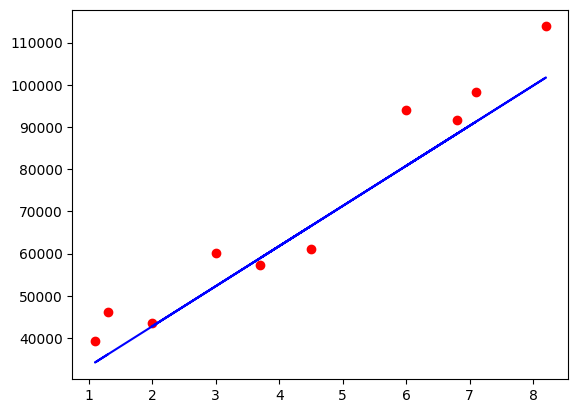

In [18]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')